<a href="https://colab.research.google.com/github/rdk004/Statistical_Learning_model/blob/main/BI3424_RishabhKulkarni_20211007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM EXPOSITION

TARGET FUNCTION:
    
    f(x) = x(1-x); f:[0,1]->R
    Modelling logistic growth curve in an ecological environment


TRAINING DATA SET (D):
    N=2
    Uniformly sampled over (0,1)


HYPOTHESIS SET:
    H = {H_0,H_1}
    where,
          H_0: h(x) = b (constant functions)
          H_1: h(x) = ax+b (straight lines)

ERM -> Minimizing least squares error (MSE) - In-sample error

Sampling - For this simulation, I have considered a sampling data set consisting of 1000 datapoints. I have tried out the simulation multiple times. The word document with the results is from one of those repetitions of the simulation.


# IMPORT MODULES

Import all necessary modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad
import pandas as pd

# PLOTTING OF TARGET FUNCTION [f(x) = x(1-x)]

Plot the target function

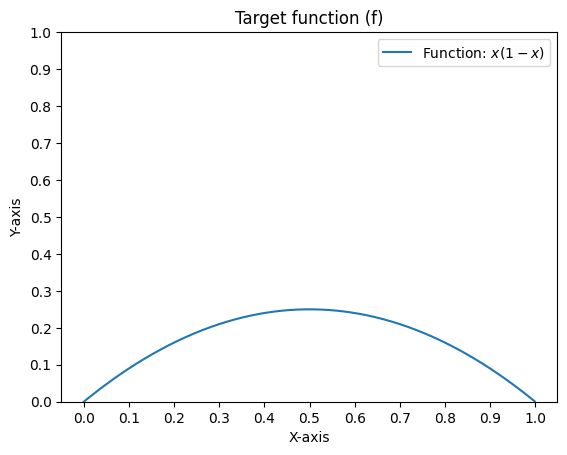

In [ ]:
def target_function(x):
    return x - x**2  # Replace this with your desired function

# Set the domain and bin separation
start = 0
end = 1
bin_size = 0.001 # Bin_size, which can be changed

# Generate x values
x_values = np.arange(start, end, bin_size)

# Calculate y values using the function
y_values = target_function(x_values)

# Plot the function
plt.plot(x_values, y_values, label='Function: $x(1-x)$')  # Update label accordingly

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Target function (f)')

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

# Add legend
plt.legend()

# Show the plot
plt.show()

# CODE FOR UNIFORM RANDOM SAMPLING OF 2 DATA POINTS

Let us create a uniform sampler that will generate (x,y) coordinates (training datasets of size 2) for testing of hypothesis

In [ ]:
def uniform_sampling():
    return (np.random.uniform(0, 1))

Let us now create a scatter plot of training data points on target function plot

0.8293800147650195 0.26985178275542854


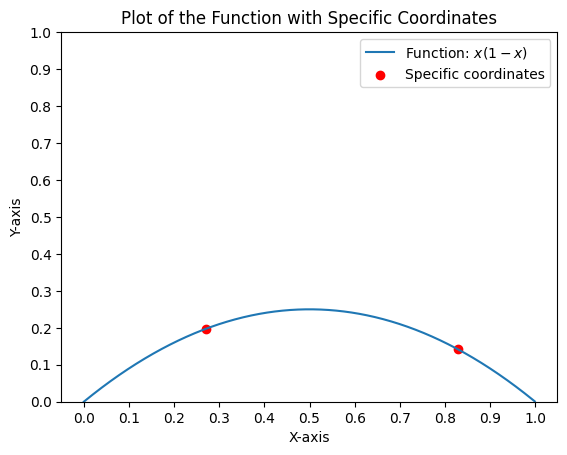

In [ ]:
x_coord_1 = uniform_sampling()
x_coord_2 = uniform_sampling()
print(x_coord_1,x_coord_2)

# Plot the function
plt.plot(x_values, y_values, label='Function: $x(1-x)$')  # Update label accordingly

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

# Define specific coordinates (tuples)
coordinates = [(x_coord_1, target_function(x_coord_1)), (x_coord_2, target_function(x_coord_2))]

# Extract x and y values from coordinates
x_coords, y_coords = zip(*coordinates)

# Scatter plot the specific coordinates
plt.scatter(x_coords, y_coords, color='red',label="Specific coordinates")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of the Function with Specific Coordinates')

# Add legend
plt.legend()

# PLOTS FOR EACH HYPOTHESIS CLASS AFTER 1000 UNIFORM RANDOM SAMPLINGS OF 2 DATA POINTS

Constant lines hypothesis (H_0)

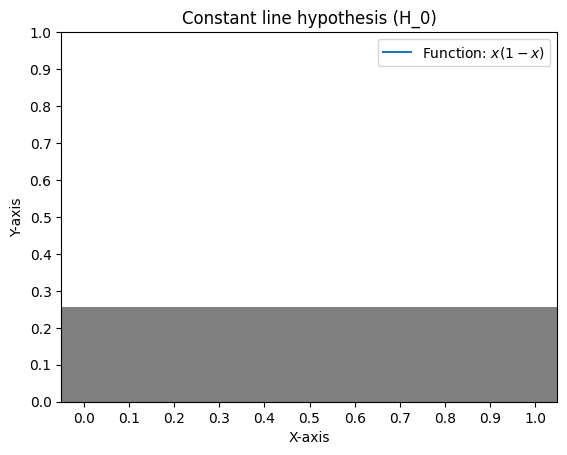

In [ ]:
# H_0: h(x) = b, where 'b' is the average y-coordinate value of the two training data points
# Our training dataset has only two points. Let us say we sample from this uniform distribution 1000 times

# First let us get our 'b' values for the 1000 samples
x_coord_1 = 0
x_coord_2 = 0
y_coord_1 = 0
y_coord_2 = 0
const = 0 # Here const is 'b'
constants=[]
for i in range(100000):
  x_coord_1 = uniform_sampling()
  x_coord_2 = uniform_sampling()
  y_coord_1 = target_function(x_coord_1)
  y_coord_2 = target_function(x_coord_2)
  const = (y_coord_1+y_coord_2)/2
  constants.append(const)

# Plot the target function
plt.plot(x_values, y_values, label='Function: $x(1-x)$')  # Update label accordingly

# Plotting the constant lines
plt.plot([], [])  # Create an empty plot
for constant in constants:
    plt.axhline(y=constant, color='grey')

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Constant line hypothesis (H_0)')
plt.legend()

# Display the plot
plt.show()

Straight lines hypothesis (H_1)

In [ ]:
# H_1: h(x) = ax + b, where 'a' is the slope of the line joining the two points and 'b' is the y-intercept of that line
# Our training dataset has only two points. Let us say we sample from this uniform distribution 1000 times.

# Let us get our 'a' and 'b' values from sampling
x_coord_1 = 0
x_coord_2 = 0
y_coord_1 = 0
y_coord_2 = 0
a = 0
b = 0
a_array=[]
b_array=[]
for i in range(100000):
  x_coord_1 = uniform_sampling()
  x_coord_2 = uniform_sampling()
  y_coord_1 = target_function(x_coord_1)
  y_coord_2 = target_function(x_coord_2)
  a = (y_coord_2-y_coord_1)/(x_coord_2-x_coord_1) # slope
  b = y_coord_1 - a*x_coord_1 # y-intercept
  a_array.append(a)
  b_array.append(b)


# Plotting
plt.plot([], [])  # Create an empty plot

# Let us generate an numpy array of x values
x=0
x_array=[]
for i in range(100000):
  x = uniform_sampling()
  x_array.append(x)

x_val = np.array(x_array)

for a, b in zip(a_array, b_array):
    y = a * x_val + b
    plt.plot(x_val, y,color='grey')

# Plot the target function
plt.plot(x_values, y_values, label='Function: $x(1-x)$', color='blue')  # Update label accordingly

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Straight line hypothesis (H_1)')
plt.legend()

# Display the plot
plt.show()

# AVERAGE MODELS FOR EACH HYPOTHESIS CLASS (ħ(x)) - Learning Algorithm

Let us now plot the average model for hypothesis H_0 (ħ(x))

In [ ]:
# First we have to convert all normal arrays into Numpy arrays
const_array_hp_0 = np.array(constants)

# Let us find the mean values of each of these arrays
const_mean_hp_0 = np.mean(const_array_hp_0)

# Let us plot these along with the target function separately

# Plot the target function (hypothesis H_0)
plt.plot(x_values, y_values, label='Function: $x(1-x)$', color='blue')  # Update label accordingly


# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(y=const_mean_hp_0, color='black', label=f'Constant Line: y={const_mean_hp_0}')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Average model of hypothesis class H_0 ((ħ(x) = b_avg)')

plt.legend()
plt.show()




Let us now plot the average line for hypothesis H_1 (ħ(x))

In [ ]:
# First we have to convert all normal arrays into Numpy arrays
a_array_hp_1 = np.array(a_array)
b_array_hp_1 = np.array(b_array)

# Let us find the mean values of each of these arrays

a_mean_hp_1 = np.mean(a_array_hp_1)
b_mean_hp_1 = np.mean(b_array_hp_1)

print(a_mean_hp_1,b_mean_hp_1)

# Let us define the x coordinates for the line
x_coordinates = np.linspace(0, 1, 10)

# Use the slope and intercept to calculate y values
y_coordinates = a_mean_hp_1 * x_coordinates + b_mean_hp_1

# Plot the line
plt.plot(x_coordinates, y_coordinates, label=f'y = {a_mean_hp_1}x + {b_mean_hp_1}',color='black')

# Plot the target function (hypothesis H_1)
plt.plot(x_values, y_values, label='Function: $x(1-x)$', color='blue')  # Update label accordingly

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Average model of hypothesis class H_1 ((ħ(x) = a_avg*x + b_avg)')
plt.legend()
plt.show()



# BIAS CALCULATION

Let us find the bias for hypothesis H_0:

Bias = E_x[bias(x)] = E_x[(ħ(x) - f(x))^2]

In [ ]:
# We will integrate the above function with limits 0 and 1
def integrand_hp_0(x):
	return (const_mean_hp_0 - x + x**2)**2
bias_hp_0 = quad(integrand_hp_0,0,1)
print(bias_hp_0)

Let us find bias for hypothesis H_1:

In [ ]:
# We will integrate the above function with limits 0 and 1
def integrand_hp_1(x):
	return (a_mean_hp_1*x + b_mean_hp_1 - x + x**2)**2
bias_hp_1 = quad(integrand_hp_1,0,1)
print(bias_hp_1)

# VARIANCE CALCULATION

Let us find the variance for hypothesis H_0:

Variance = E_x[var(x)] = E_x[E_D[(h^(D)(x) - ħ(x))^2]] = E_D[E_x[(h^(D)(x) - ħ(x))^2]]

In [ ]:
# We will integrate the inner expectation with limits 0 and 1 for every possible model function and add the integral values over entire sample space.
# Here h^(D)(x) is our model function for every sampling iteration. We have considered 1000 iterations here.

var_iteration = 0 # for every model function
var_iteration_arr = []
var_total_hp_0 = 0 # total variance variable

def integrand_hp_0(x,var_total_hp_0):
    return var_total_hp_0

for const in constants:
  var_iteration = (const - const_mean_hp_0)**2 # Variance at a given 'x' value
  var_iteration_arr.append(var_iteration)
  var_total_hp_0+=var_iteration

var_total_hp_0/=100000 # E_D[(h^(D)(x) - ħ(x))^2]

var_final_hp_0 = quad(integrand_hp_0,0,1,args=(var_total_hp_0)) # E_x[E_D[(h^(D)(x) - ħ(x))^2]]

print(var_final_hp_0) # Variance plus error term

Let us find the variance for hypothesis H_1:

In [ ]:
# We will integrate the inner expectation with limits 0 and 1 for every possible model function and add the integral values over entire sample space.
# Here h^(D)(x) is our model function for every sampling iteration. We have considered 1000 iterations here.
var_iteration = 0 # for every model function
var_iteration_arr_hp_1 = []
var_total_hp_1 = 0 # total variance variable
var_error_arr = []

def integrand_hp_1(x,a_model,b_model,a_mean_hp_1,b_mean_hp_1):
    return (a_model*x + b_model - a_mean_hp_1*x - b_mean_hp_1)**2

a_model=0
b_model=0

for i in range(100000):
  a_model = a_array[i]
  b_model = b_array[i]
  var_iteration = quad(integrand_hp_1,0,1,args=(a_model,b_model,a_mean_hp_1,b_mean_hp_1)) # E_x[(h^(D)(x) - ħ(x))^2]
  var_iteration_arr_hp_1.append(var_iteration[0])
  var_total_hp_1+=var_iteration[0]
  var_error_arr.append(var_iteration[1])

var_final_hp_1 = var_total_hp_1/100000 # E_D[E_x[(h^(D)(x) - ħ(x))^2]]

print(var_final_hp_1, (sum(var_error_arr))/1000) # Variance plus error term

# PLOT WITH BIAS AND VARIANCE FOR EACH HYPOTHESIS CLASS

In [ ]:
# Plot the target function (hypothesis H_0)
plt.plot(x_values, y_values, label='Function: $x(1-x)$', color='blue')  # Update label accordingly

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(y=const_mean_hp_0, color='black', label=f'ħ(x): y={const_mean_hp_0}')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Average line of hypothesis H_0 ((ħ(x) = b_avg)')

# Showing variance
y_mean = np.full(100000, const_mean_hp_0, dtype=float)
x = np.linspace(0,1,100000)
var_hp_0 = np.array(var_iteration_arr)
plt.fill_between(x, y_mean - var_hp_0, y_mean + var_hp_0, alpha=1, label='var(x): Variance at each point', color='orange')

plt.legend()
caption_text = f'bias = {round(bias_hp_0[0],3)}           var = {round(var_final_hp_0[0],3)}'
plt.text(0.5,0.5,caption_text, fontsize=12, color='green', ha='center', va='center')
plt.show()

In [ ]:
# Let us define the x coordinates for the line
x_coordinates = np.linspace(0, 1, 10)

# Use the slope and intercept to calculate y values
y_coordinates = a_mean_hp_1 * x_coordinates + b_mean_hp_1

# Plot the line
plt.plot(x_coordinates, y_coordinates, label=f'ħ(x) = {a_mean_hp_1}x + {b_mean_hp_1}',color='black')

# Plot the target function (hypothesis H_1)
plt.plot(x_values, y_values, label='Function: $x(1-x)$', color='blue')  # Update label accordingly

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Average line of hypothesis H_1 ((ħ(x): y = a_avg*x + b_avg)')


# Showing variance

x = np.linspace(0,1,100000)
y_mean = a_mean_hp_1*x + b_mean_hp_1
y_variance = np.array(var_iteration_arr_hp_1)

# Fill between the upper and lower bounds to represent variance
plt.fill_between(x, y_mean - y_variance, y_mean + y_variance, alpha=1, label='var(x): Variance at each point', color='orange')
plt.legend()
caption_text = f'bias = {round(bias_hp_1[0],3)}           var = {round(var_final_hp_1,3)}'
plt.text(0.5,0.5,caption_text, fontsize=12, color='green', ha='center', va='center')
plt.show()

# MSE

We will now try to find the best hypothesis MSE wise (first hypothesis H_0):

In [ ]:
mse_model_array_hp_0 = []
mse_model = 0
def integrand_hp_0(x,const_model):
    return ((const_model - x + x**2)**2)

for const_model in constants:
  mse_model = quad(integrand_hp_0,0,1,args=(const_model))
  mse_model_array_hp_0.append(mse_model[0])

min_mse = min(mse_model_array_hp_0) # MSE of best fitting model
index_mse = mse_model_array_hp_0.index(min_mse)
best_model_const = constants[index_mse]

# Plot the target function (hypothesis H_0)
plt.plot(x_values, y_values, label='Function: $x(1-x)$', color='blue')  # Update label accordingly

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(y=best_model_const, color='black', label=f'Constant Line: y={best_model_const}')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Best H_0 class model function (MSE wise)')

plt.legend()
caption_text = f'MSE = {min_mse}'
plt.text(0.5,0.5,caption_text, fontsize=12, color='green', ha='center', va='center')
plt.show()

Hypothesis class H_1:

In [ ]:
mse_model_array_hp_1 = []
mse_model_hp_1 = 0
def integrand_hp_0(x,a_model,b_model):
    return ((a_model*x + b_model - x + x**2)**2)

a_model=0
b_model=0

for i in range(100000):
  a_model=a_array[i]
  b_model=b_array[i]
  mse_model_hp_1 = quad(integrand_hp_0,0,1,args=(a_model,b_model))
  mse_model_array_hp_1.append(mse_model_hp_1[0])

min_mse_hp_1 = min(mse_model_array_hp_1) # MSE of best fitting model
index_mse = mse_model_array_hp_1.index(min_mse_hp_1)
best_model_a = a_array[index_mse]
best_model_b = b_array[index_mse]

# Let us define the x coordinates for the line
x_coordinates = np.linspace(0, 1, 10)

# Use the slope and intercept to calculate y values
y_coordinates = best_model_a * x_coordinates + best_model_b

# Plot the line
plt.plot(x_coordinates, y_coordinates, label=f'y = {best_model_a}x + {best_model_b}',color='black')

# Plot the target function (hypothesis H_1)
plt.plot(x_values, y_values, label='Function: $x(1-x)$', color='blue')  # Update label accordingly

# Set the y-axis limit to a specific value (e.g., 30)
plt.ylim(0, 1)  # Adjust the upper limit as needed

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Best H_1 class model function (MSE wise)')

plt.legend()
caption_text = f'MSE = {min_mse_hp_1}'
plt.text(0.5,0.5,caption_text, fontsize=12, color='green', ha='center', va='center')
plt.show()

# DATAFRAME WITH IMPORTANT INFORMATION

Let us create a dataframe to store all important data

In [ ]:
dict_data = {'Hypothesis class':['H_0','H_1'],'Out of sample error':[bias_hp_0[0]+var_final_hp_0[0],bias_hp_1[0]+var_final_hp_1],'Bias':[bias_hp_0[0],bias_hp_1[0]],'Variance':[var_final_hp_0[0],var_final_hp_1],'MSE':[min_mse,min_mse_hp_1],'Best fitting models produced by learning algorithm':[f'y = {round(const_mean_hp_0,3)}',f'y = {round(a_mean_hp_1,3)}x + {round(b_mean_hp_1,3)}']}
hp_model_df = pd.DataFrame(dict_data)
hp_model_df

The better hypothesis class (MSE wise) is H_0

E_out_H_0 = 0.008 (in the word file, due to rounding off, the value is 0.009)

E_out_H_1 = 0.035

bias_H_0 = 0.006, var_H_0 = 0.003

bias_H_1 = 0.013, var_H_1 = 0.022

Expectation values of the hypotheses w.r.t D:

H_0: h(x) = b; ħ(x) = 0.167

H_1: h(x) = ax + b; ħ(x) = 0.016x + 0.243

Note: All of these have been calculated by uniform random sampling of two data points from the distribution 1000 times. These values can change slightly each time the simulation is repeated

CONCLUSION: Overall, the better hypothesis class for prediction is H_0: h(x) = b
